In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [49]:
train= pd.read_csv("C:/Users/aksha/Downloads/train.csv")
test =pd.read_csv("C:/Users/aksha/Downloads/test.csv")

In [50]:
train_og =train.copy()
test_og =test.copy()

In [51]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [52]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [53]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [54]:
train.shape

(614, 13)

In [55]:
test.shape

(367, 12)

In [56]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [57]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

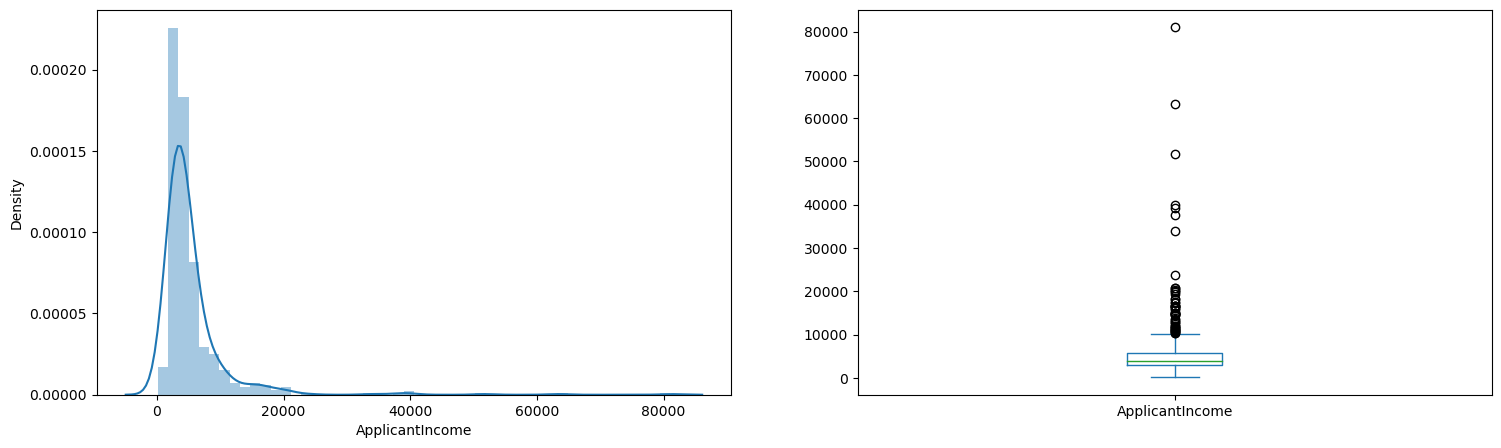

In [58]:
plt.figure(figsize=(18,5)) 
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box()
plt.show()

<AxesSubplot:>

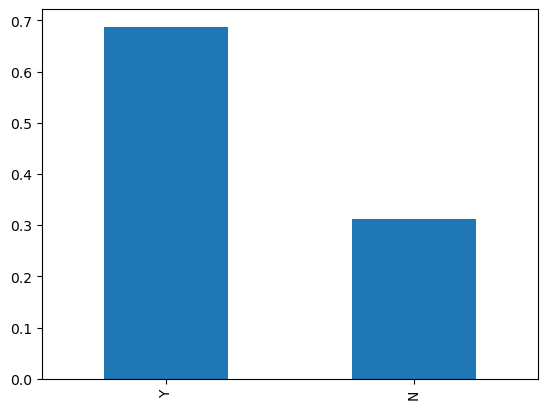

In [59]:
train['Loan_Status'].value_counts(normalize=True).plot.bar()

<AxesSubplot:>

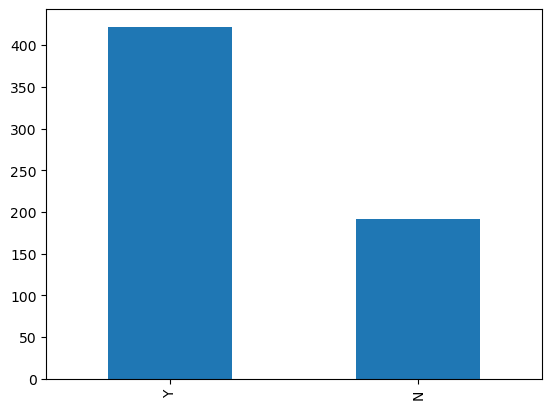

In [60]:
train['Loan_Status'].value_counts().plot.bar()

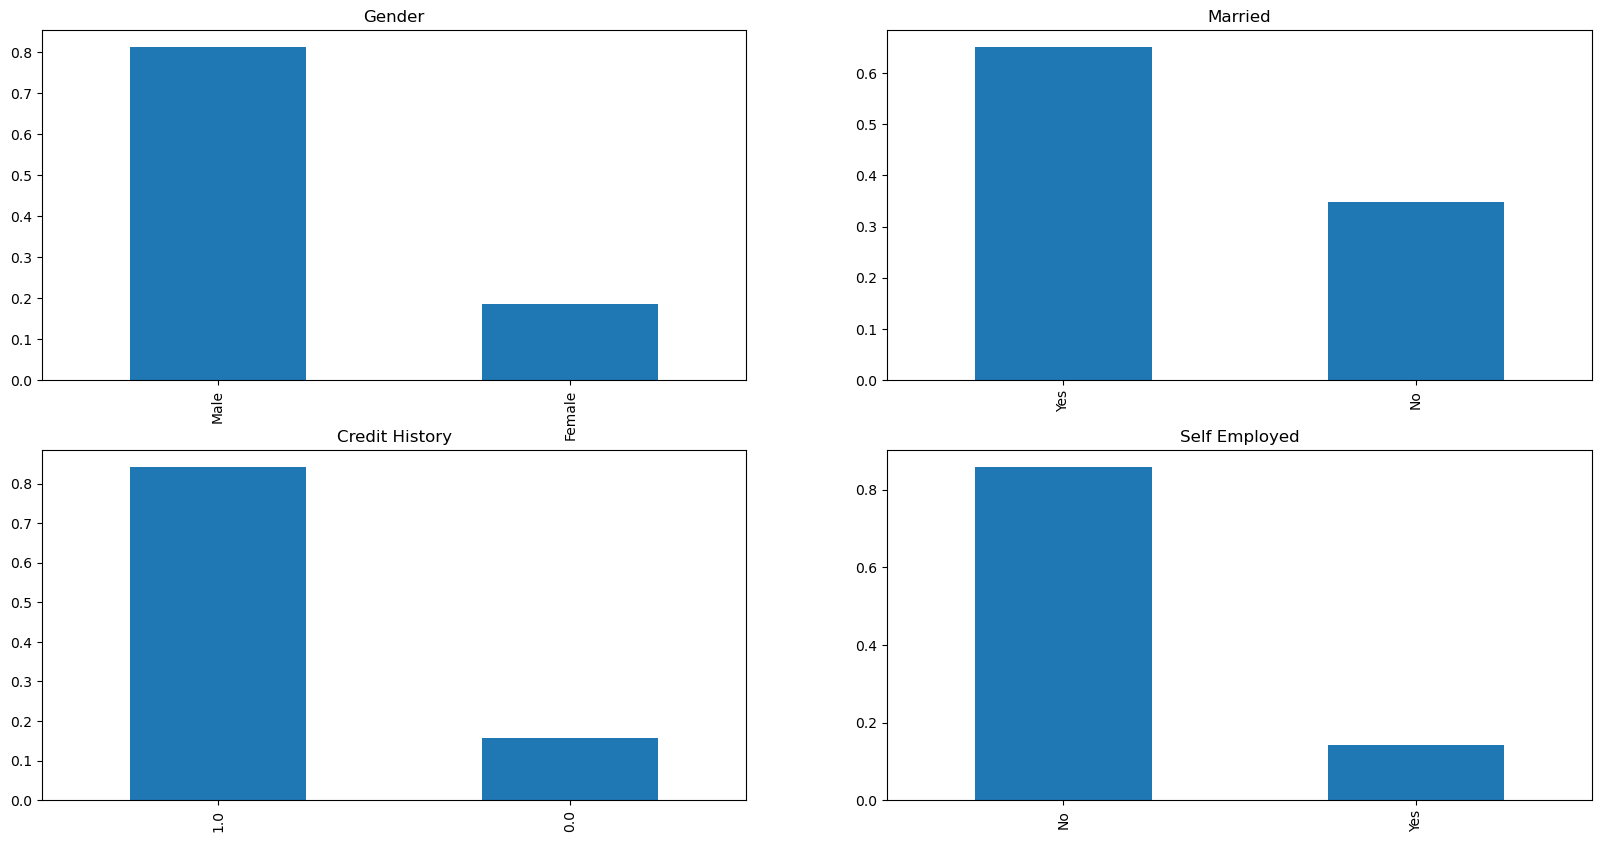

In [61]:
plt.figure(figsize=(20,10)) 
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit History')
plt.subplot(224)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self Employed')
plt.show()

plt.figure(figsize=(18,5)) 
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

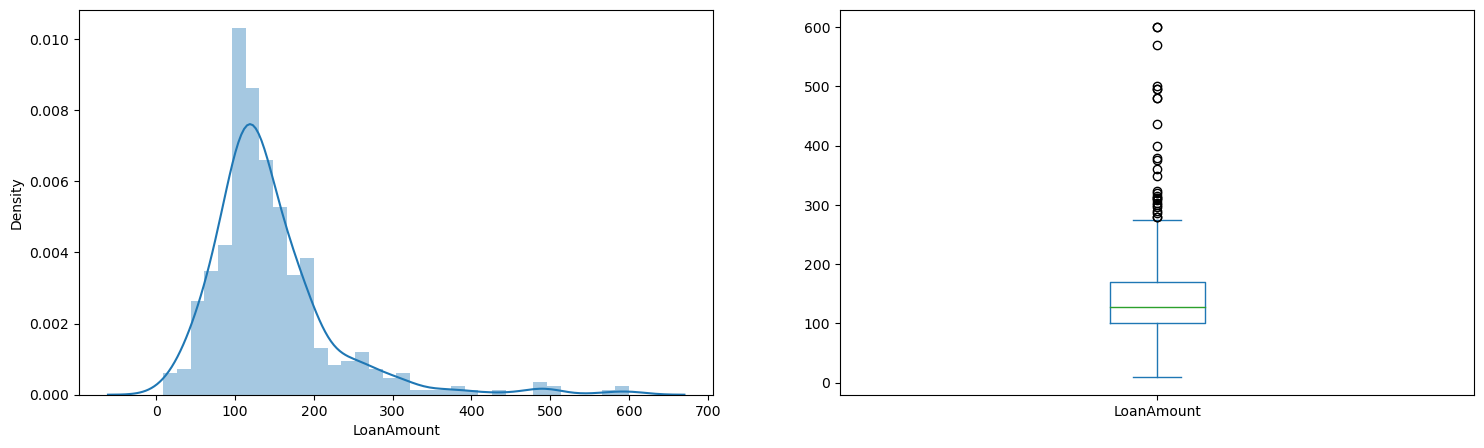

In [62]:
plt.figure(figsize=(18,5))
df=train.dropna()
plt.subplot(121)
sns.distplot(df['LoanAmount'])
plt.subplot(122)
df['LoanAmount'].plot.box()
plt.show

Text(0.5, 0.98, '')

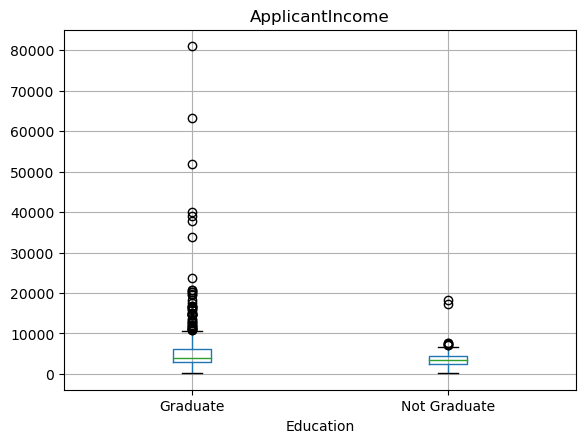

In [63]:
train.boxplot(column="ApplicantIncome", by='Education')
plt.suptitle("")

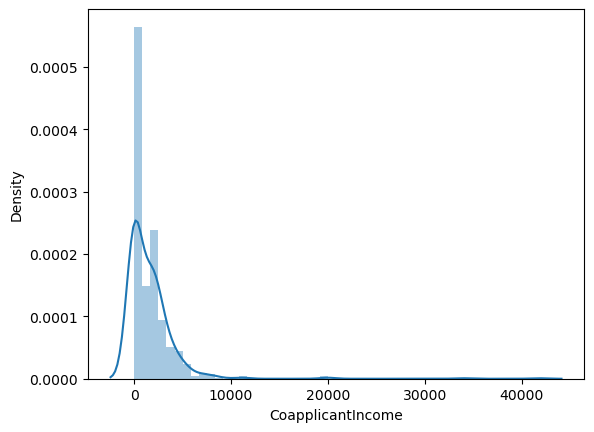

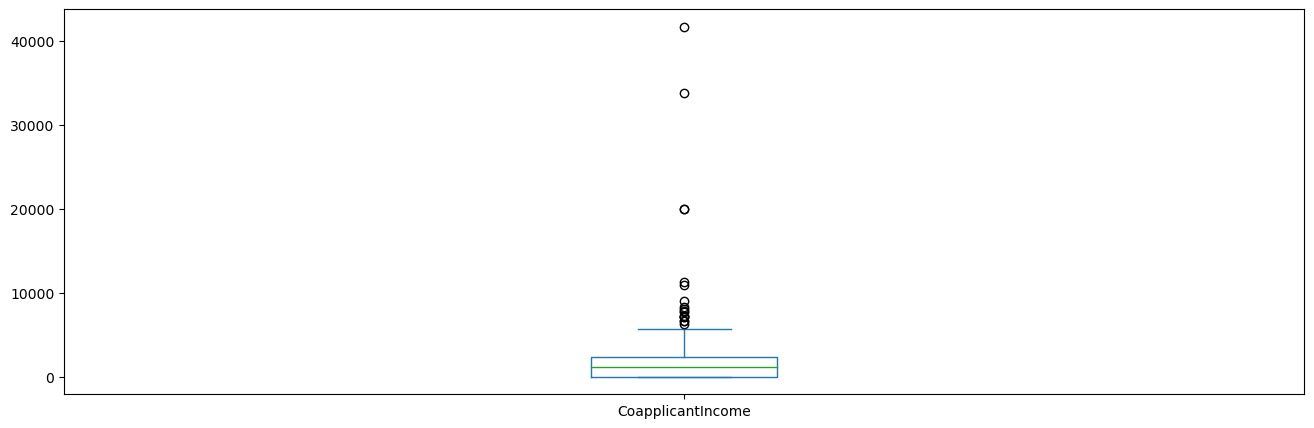

In [64]:
sns.distplot(train["CoapplicantIncome"])
plt.show()
train["CoapplicantIncome"].plot.box(figsize=(16,5))
plt.show()

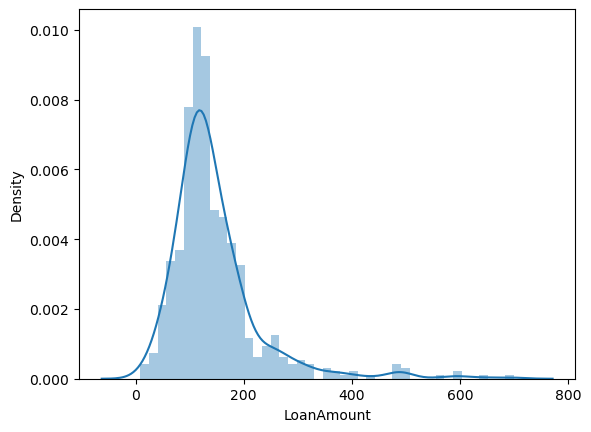

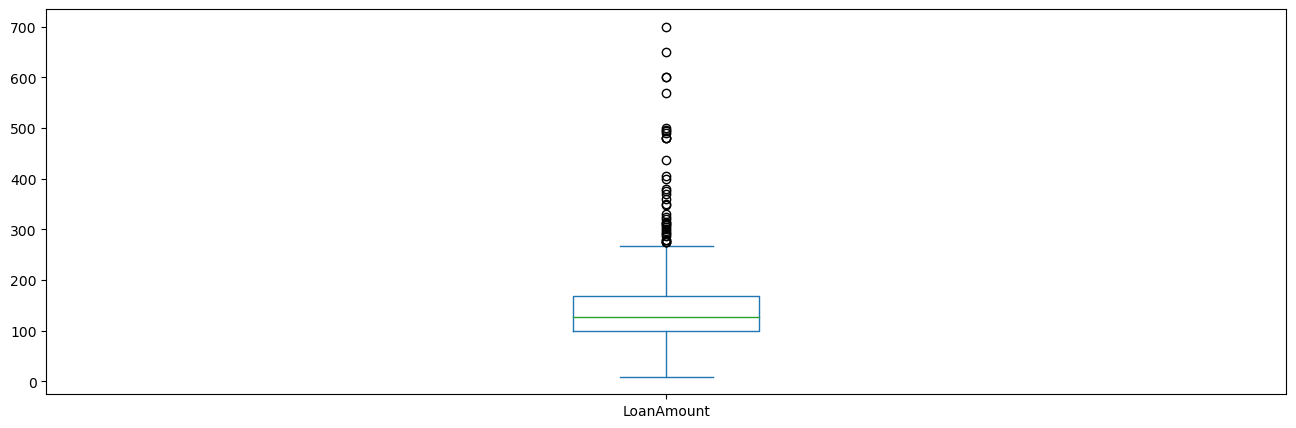

In [65]:
train.notna()
sns.distplot(train["LoanAmount"])
plt.show()
train["LoanAmount"].plot.box(figsize=(16,5))
plt.show()

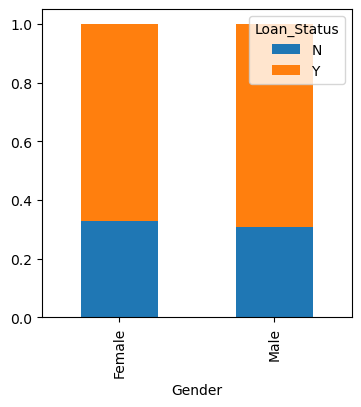

In [66]:
Gender=pd.crosstab(train["Gender"],train["Loan_Status"])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

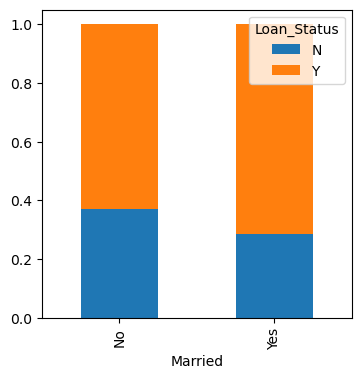

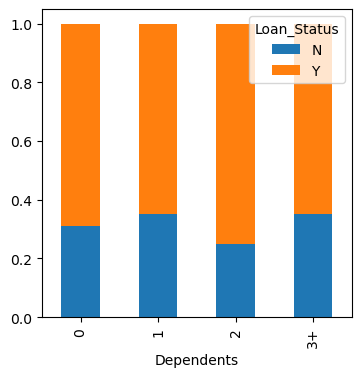

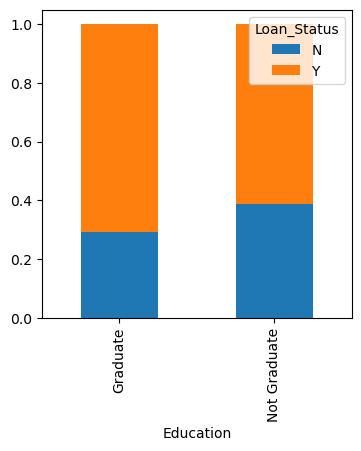

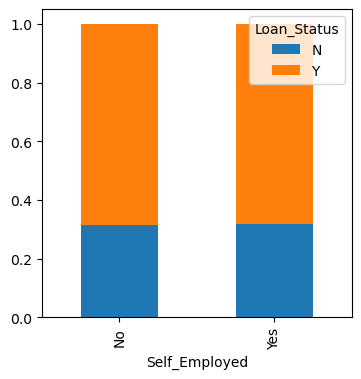

In [67]:
Married=pd.crosstab(train["Married"],train["Loan_Status"])
Dependents=pd.crosstab(train["Dependents"],train["Loan_Status"])
Education=pd.crosstab(train["Education"],train["Loan_Status"])
Self_Employed=pd.crosstab(train["Self_Employed"],train["Loan_Status"])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

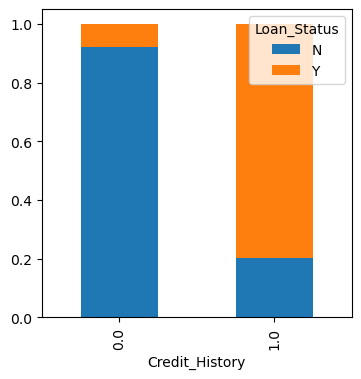

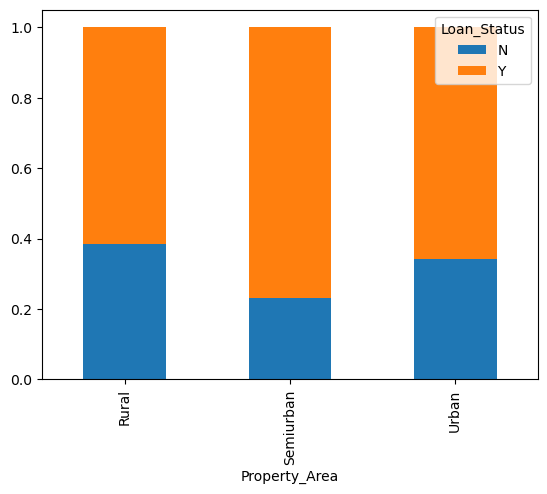

In [68]:
Credit_History=pd.crosstab(train["Credit_History"],train["Loan_Status"])
Property_Area=pd.crosstab(train["Property_Area"],train["Loan_Status"])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.show()

<AxesSubplot:xlabel='Loan_Status'>

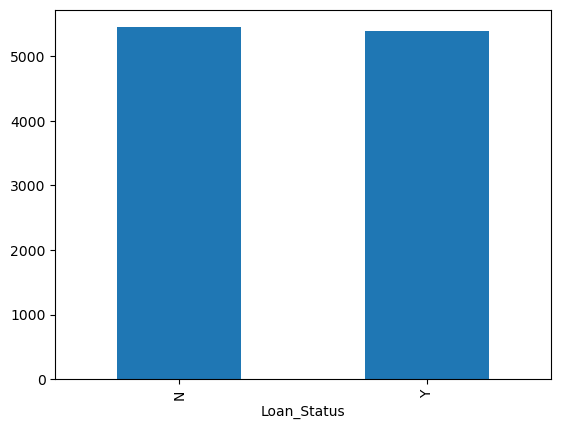

In [69]:
train.groupby("Loan_Status")["ApplicantIncome"].mean().plot.bar()

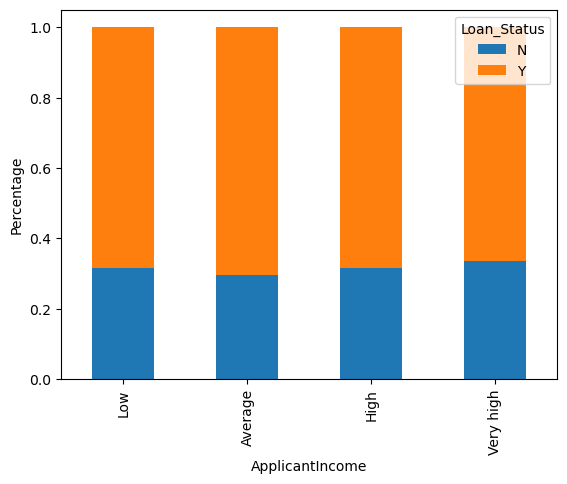

In [70]:
bins=[0,2500,4000,6000,81000]
group=["Low","Average","High","Very high"]
train["Income_bin"]=pd.cut(train["ApplicantIncome"],bins,labels=group)
Income_bin=pd.crosstab(train["Income_bin"],train["Loan_Status"])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel("ApplicantIncome")
P=plt.ylabel("Percentage")

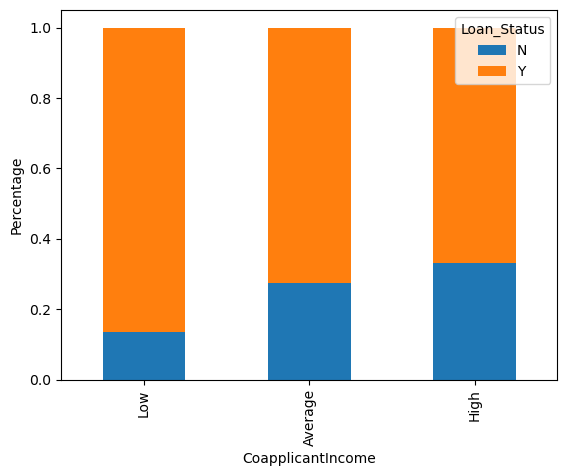

In [71]:
bins=[0,1000,3000,42000]
group=["Low","Average","High"]
train["Coapplicant_Income_bin"]=pd.cut(train["CoapplicantIncome"],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train["Coapplicant_Income_bin"],train["Loan_Status"])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel("CoapplicantIncome")
P=plt.ylabel("Percentage")

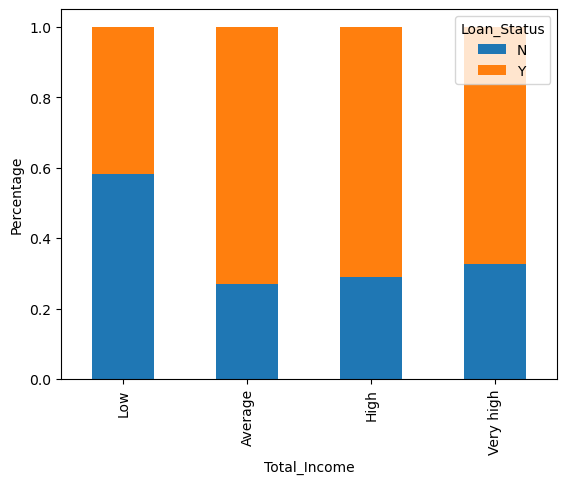

In [72]:
train["Total_Income"]=train["ApplicantIncome"]+train["CoapplicantIncome"]
bins=[0,2500,4000,6000,81000]
group=["Low","Average","High","Very high"]
train["Total_Income_bin"]=pd.cut(train["Total_Income"],bins,labels=group)
Total_Income_bin=pd.crosstab(train["Total_Income_bin"],train["Loan_Status"])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel("Total_Income")
P=plt.ylabel("Percentage")

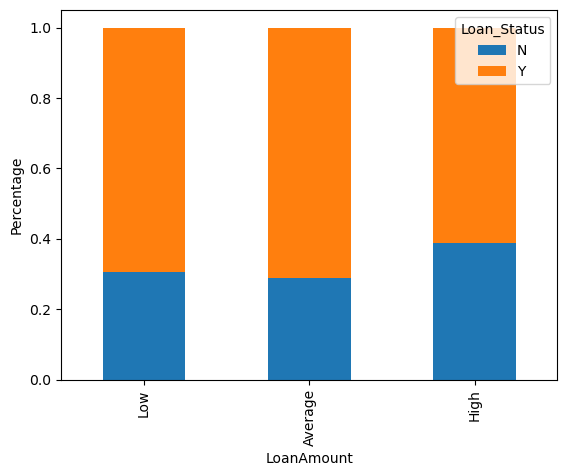

In [73]:
bins=[0,100,200,700]
group=["Low","Average","High"]
train["LoanAmount_bin"]=pd.cut(train["LoanAmount"],bins,labels=group)
LoanAmount_bin=pd.crosstab(train["LoanAmount_bin"],train["Loan_Status"])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel("LoanAmount")
P=plt.ylabel("Percentage")

In [74]:
train=train.drop(["Income_bin", "Coapplicant_Income_bin", "LoanAmount_bin", "Total_Income_bin", "Total_Income"], axis=1)
train["Dependents"].replace("3+", 3,inplace=True)
test["Dependents"].replace("3+", 3,inplace=True)
train["Loan_Status"].replace("N", 0,inplace=True)
train["Loan_Status"].replace("Y", 1,inplace=True)

matrix = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

In [75]:
train["Gender"].fillna(train["Gender"].mode()[0], inplace=True)
train["Married"].fillna(train["Married"].mode()[0], inplace=True)
train["Dependents"].fillna(train["Dependents"].mode()[0], inplace=True)
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0], inplace=True)
train["Credit_History"].fillna(train["Credit_History"].mode()[0], inplace=True)

In [76]:
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0], inplace=True)

In [77]:
train["LoanAmount"].fillna(train["LoanAmount"].median(), inplace=True)

In [78]:
test["Gender"].fillna(train["Gender"].mode()[0], inplace=True)
test["Married"].fillna(train["Married"].mode()[0], inplace=True)
test["Dependents"].fillna(train["Dependents"].mode()[0], inplace=True)
test["Self_Employed"].fillna(train["Self_Employed"].mode()[0], inplace=True)
test["Credit_History"].fillna(train["Credit_History"].mode()[0], inplace=True)
test["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0], inplace=True)
test["LoanAmount"].fillna(train["LoanAmount"].median(), inplace=True)

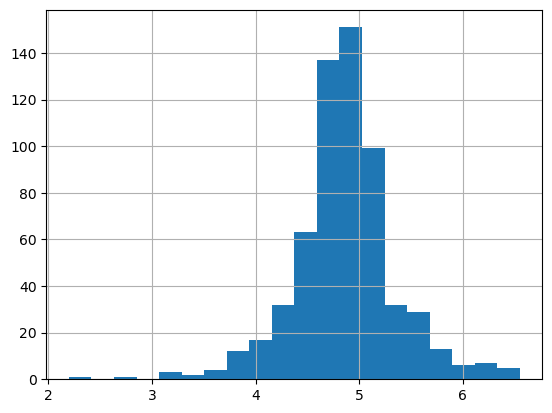

In [79]:
train["LoanAmount_log"]=np.log(train["LoanAmount"])
train["LoanAmount_log"].hist(bins=20)
test["LoanAmount_log"]=np.log(test["LoanAmount"])

In [80]:
train=train.drop("Loan_ID",axis=1)
test=test.drop("Loan_ID",axis=1)

In [81]:
X = train.drop("Loan_Status",1)
y = train.Loan_Status

In [82]:
X = pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [83]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3)

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)
LogisticRegression()

LogisticRegression()

In [85]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)
0.7891891891891892

0.7891891891891892

In [86]:
pred_test = model.predict(test)

In [87]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

NameError: name 'submission' is not defined

In [ ]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Output/logistic.csv')